In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()

In [3]:
data = pd.read_csv("/content/iris.data",header=None).values

In [4]:
iris_data = load_iris()
iris_data = pd.DataFrame(data= np.c_[iris_data['data'], data[:,-1].reshape(-1,1)],
                     columns= iris_data['feature_names'] + ['target'])
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


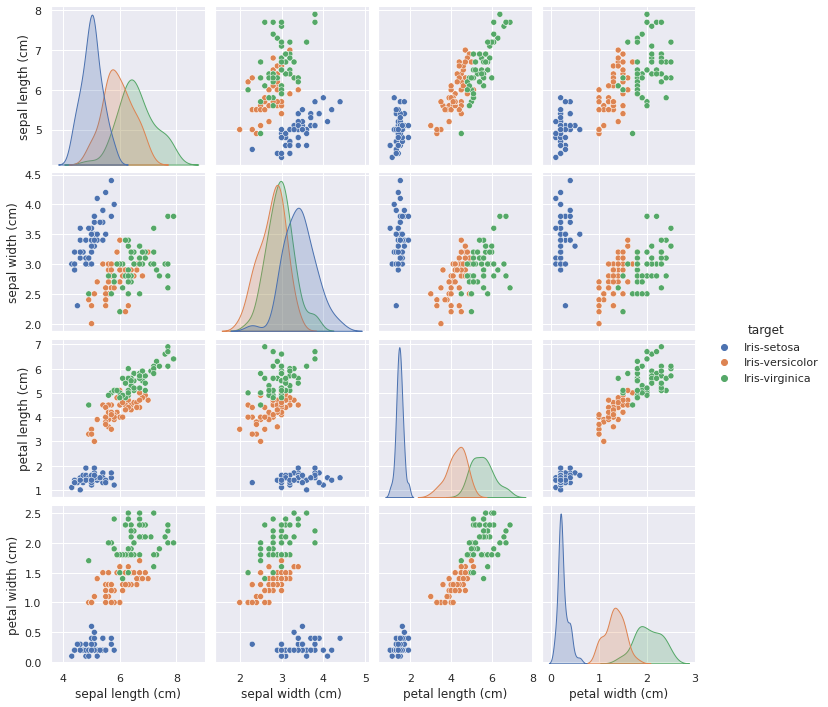

In [12]:
# scatter plot for different feature combinations
sns.pairplot(data=iris_data,hue="target")
plt.show()



> ## From the above pairwise scatter plots we can observe that the class Iris-setosa is linearly separable from combination of Iris-versicolor and Iris-virginica



In [13]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']

adult_data = pd.read_csv(url, names=columns, index_col=False)
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
adult_data.shape

(32561, 15)

In [15]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


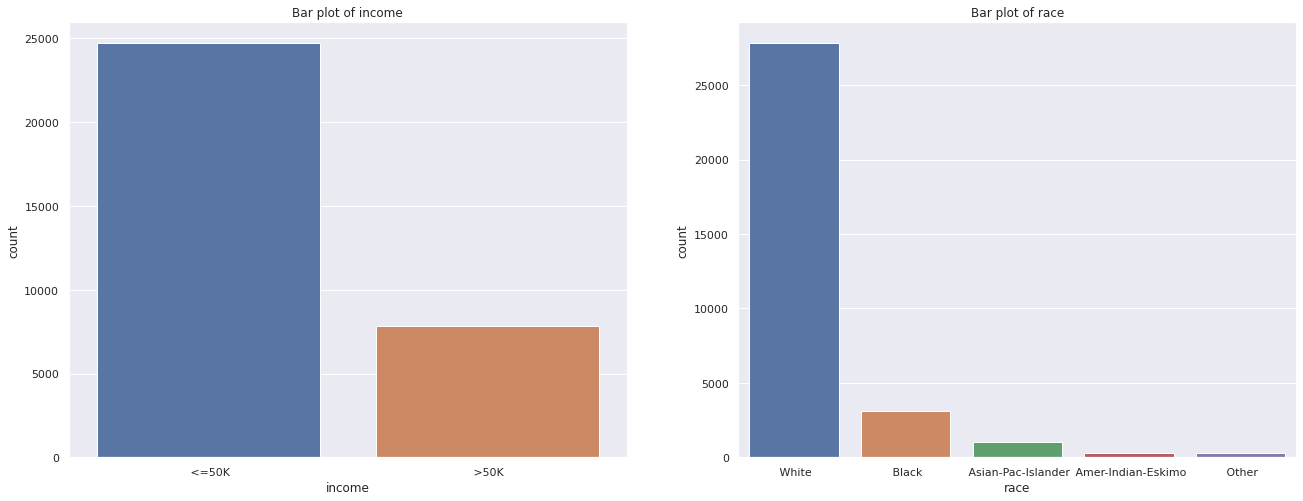

In [65]:
# visualizing the bar plot for income and race from dataset
fig,axes = plt.subplots(1,2,figsize=(22,8))

sns.countplot(x='income', data=adult_data,ax=axes[0])
axes[0].set_title("Bar plot of income")

sns.countplot(x='race', data=adult_data,ax=axes[1])
axes[1].set_title("Bar plot of race")

plt.show()

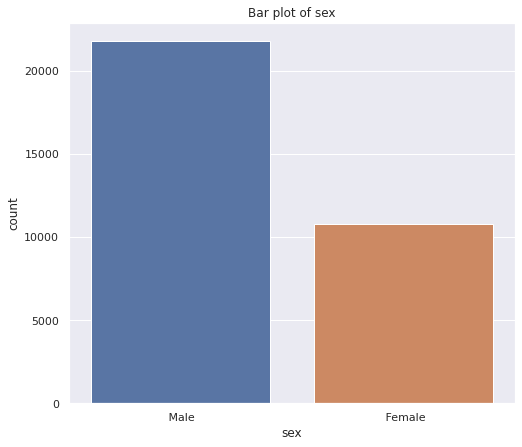

In [69]:
# bar plot of sex 
fig = plt.figure(figsize=(8,7))

sns.countplot(x='sex', data=adult_data)
plt.title("Bar plot of sex")
plt.show()

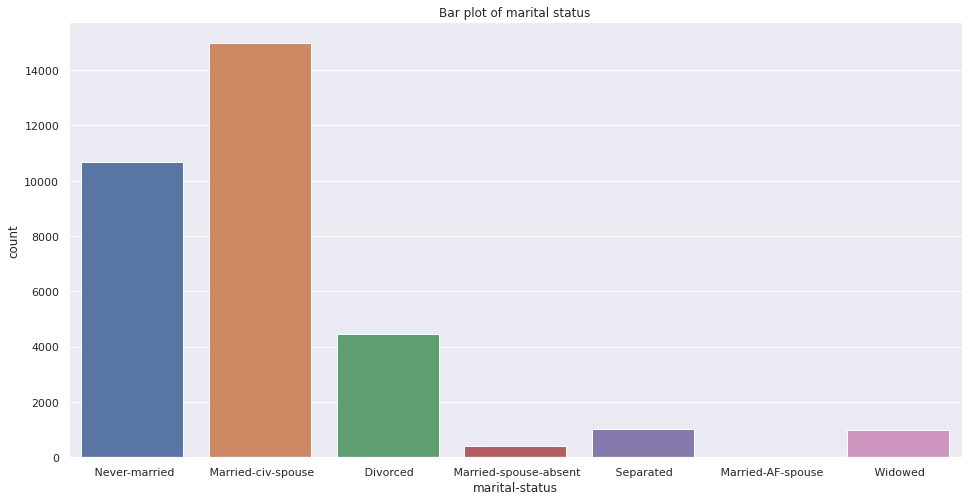

In [72]:
fig = plt.figure(figsize=(16,8))

sns.countplot(x='marital-status', data=adult_data)
plt.title("Bar plot of marital status")
plt.show()

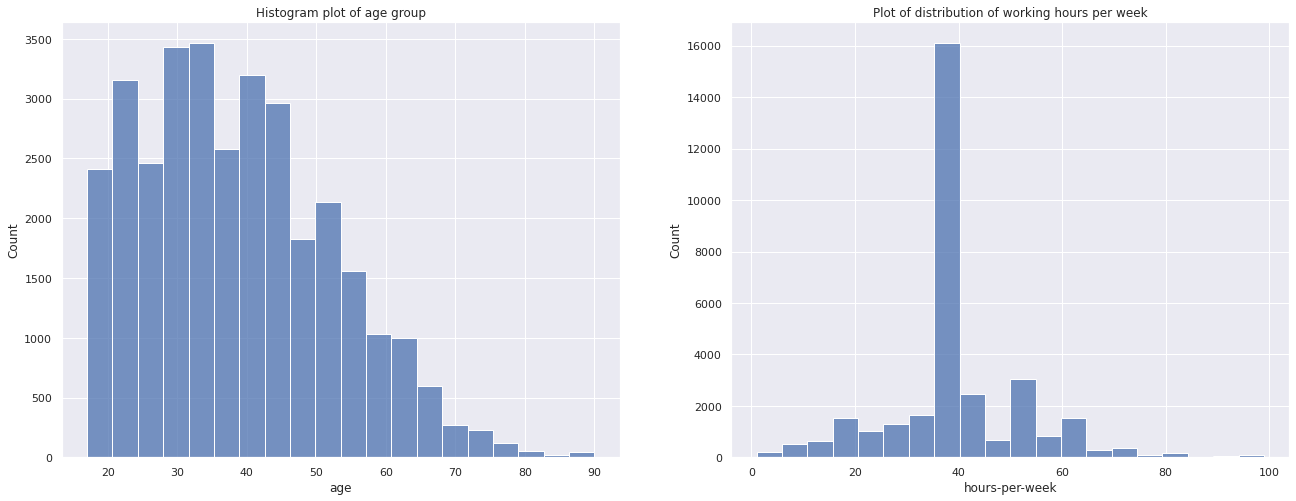

In [62]:
# histogram plot to visualize the distribution of age group and working hours per week
fig,axes = plt.subplots(1,2,figsize=(22,8))

sns.histplot(adult_data['age'], bins=20,ax=axes[0])
axes[0].set_title("Histogram plot of age group")

sns.histplot(adult_data['hours-per-week'], bins=20,ax=axes[1])
axes[1].set_title("Plot of distribution of working hours per week")

plt.show()

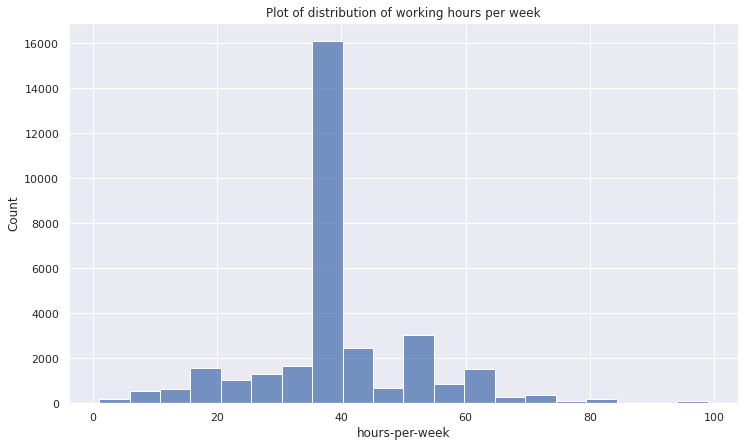

In [34]:
fig = plt.figure(figsize=(12,7))

sns.histplot(adult_data['hours-per-week'], bins=20)
plt.title("Plot of distribution of working hours per week")
plt.show()

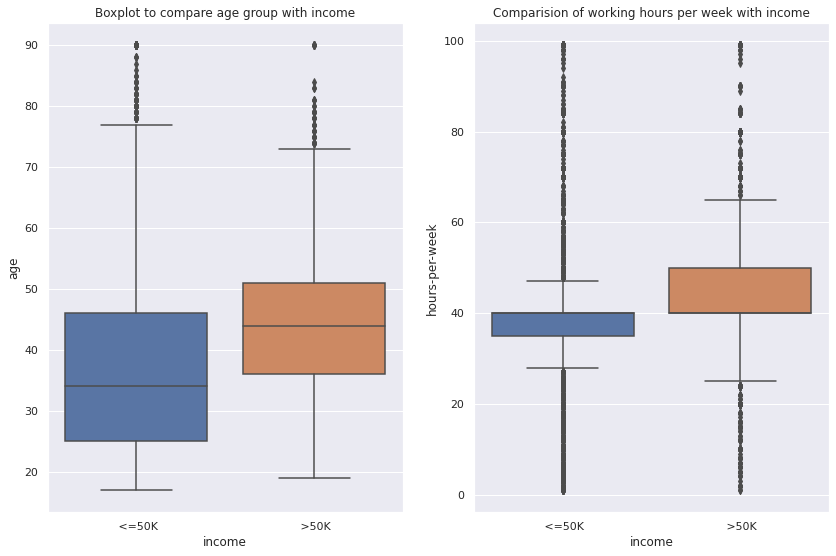

In [82]:
# box plot to relate the age group with respect to income
fig,axes = plt.subplots(1,2,figsize=(14,9))

sns.boxplot(x='income', y='age', data=adult_data,ax=axes[0])
axes[0].set_title("Boxplot to compare age group with income")

# box plot to relate the age working hours per week with respect to income
sns.boxplot(x='income', y='hours-per-week', data=adult_data,ax=axes[1])
axes[1].set_title("Comparision of working hours per week with income")

plt.show()

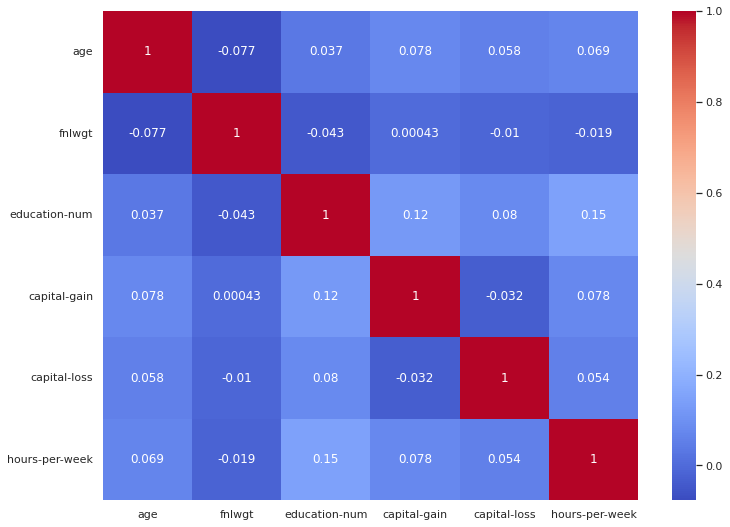

In [74]:
# heatmap to find the correlation between different attributes of the datset
fig = plt.figure(figsize=(12,9))

corr = adult_data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.yticks(rotation=360)
plt.show()